## Part 2 - IPL Game Comparision

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import IPL ball by ball dataset

IPLbyb = pd.read_excel('D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week3\\IPLbyb.xlsx')
print(IPLbyb.columns.tolist())

['home team', 'batting_team', 'bowling_team', 'gameno', 'innings_number', 'over_no', 'ball_no', 'runs_total_end', 'delivery_no', 'delno^2', 'runs*wkts', 'wicket', 'wkts_total_end']


In [3]:
IPLbyb


,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end
0,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,1,0,1,1,0,0,0
1,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,2,0,2,4,0,0,0
2,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,3,0,3,9,0,0,0
3,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,4,4,4,16,0,0,0
4,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,5,5,5,25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14281,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,5,177,110,12100,354,0,2
14282,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,6,177,111,12321,354,0,2
14283,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,1,177,112,12544,354,0,2
14284,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,2,177,113,12769,354,0,2


In [12]:
# First, the function for plotting the runs and wickets for each team in a game.

def plot_runs_wickets(IPLbyb, ax):
    gameno = IPLbyb['gameno'].unique()[0]
    for inning, data in IPLbyb.groupby('innings_number'):
        # create separate dataframe for wickets
        wicket = data[data['wicket'] > 0]
        # plots line
        ax.plot(data['delivery_no'],data['runs_total_end'])
        # plots markers
        marker = 'bo' if inning == 1 else 'ro'
        ax.plot(wicket['delivery_no'],wicket['runs_total_end'], marker)
        # labels
        ax.set_xlabel('balls')
        ax.set_ylabel('runs')
        ax.set_title(f'Game {gameno}')
    ax.legend(['runs1','wkt1','runs2','wkt2'])

In [13]:
# Second, a function that allows us to plot two or more games at the same time. 

def plot_runs_wickets_multi_game(list_games):
    n = len(list_games)
    fig, axs = plt.subplots(n, 1, figsize=(6,15))
    for i, gameno in enumerate(list_games):
        game = IPLbyb[IPLbyb['gameno'] == gameno]
        plot_runs_wickets(game, axs[i] if n > 1 else axs)

In [14]:
# Identify if the home team batted first

IPLbyb['hometeambatsfirst']= np.where((IPLbyb['home team']==IPLbyb['batting_team']) & (IPLbyb['innings_number']==1),'yes','no')
IPLbyb

,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,1,0,1,1,0,0,0,yes
1,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,2,0,2,4,0,0,0,yes
2,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,3,0,3,9,0,0,0,yes
3,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,4,4,4,16,0,0,0,yes
4,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,5,5,5,25,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14281,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,5,177,110,12100,354,0,2,no
14282,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,6,177,111,12321,354,0,2,no
14283,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,1,177,112,12544,354,0,2,no
14284,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,2,177,113,12769,354,0,2,no


In [15]:
# drop duplicates so we just have a list of games

games = IPLbyb.drop_duplicates('gameno')

In [16]:
# generate list of games

games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games

,gameno,home team,road team,hometeambatsfirst
0,1,Mumbai Indians,Chennai Super Kings,yes
246,2,Kings XI Punjab,Delhi Daredevils,no
484,3,Kolkata Knight Riders,Royal Challengers Bangalore,no
728,4,Sunrisers,Rajasthan Royals,no
953,5,Chennai Super Kings,Kolkata Knight Riders,no
1199,6,Rajasthan Royals,Delhi Daredevils,yes
1345,7,Sunrisers,Mumbai Indians,no
1590,8,Royal Challengers Bangalore,Kings XI Punjab,no
1827,9,Mumbai Indians,Delhi Daredevils,yes
2073,10,Kolkata Knight Riders,Sunrisers,yes


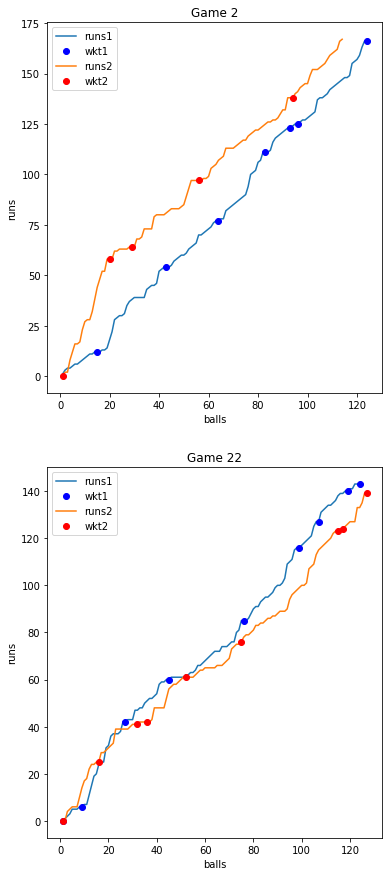

In [19]:
# Inside the square brackets we can type in game numbers, separated by a comma, to specify the games we want to compare

plot_runs_wickets_multi_game([2, 22])

In [ ]:
plot_runs_wickets_multi_game([3, 29])

In [ ]:
plot_runs_wickets_multi_game([4, 28])

In [ ]:
plot_runs_wickets_multi_game([5, 33])

In [4]:
Game1 = IPLbyb[IPLbyb.gameno == 1]
Game1

,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end
0,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,1,0,1,1,0,0,0
1,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,2,0,2,4,0,0,0
2,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,3,0,3,9,0,0,0
3,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,4,4,4,16,0,0,0
4,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,5,5,5,25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Mumbai Indians,Chennai Super Kings,Mumbai Indians,1,2,19,1,159,120,14400,1590,0,10
242,Mumbai Indians,Chennai Super Kings,Mumbai Indians,1,2,19,2,159,121,14641,1590,0,10
243,Mumbai Indians,Chennai Super Kings,Mumbai Indians,1,2,19,3,159,122,14884,1590,0,10
244,Mumbai Indians,Chennai Super Kings,Mumbai Indians,1,2,19,4,165,123,15129,1650,0,10


In [11]:
MI = Game1[Game1.batting_team == 'Mumbai Indians']
MIwicket = MI[MI['wicket']>0]

CSK = Game1[Game1.batting_team == 'Chennai Super Kings']
CSKwicket = CSK[CSK['wicket']>0]